# Test for SW model with IT generation 

This notebook aims at testing Internal Tide Generation in a basic study case (ridge in the middle). 

In [1]:
import numpy as np 
np.set_printoptions(linewidth=180)
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('Agg')

In [2]:
path_config = 'config_test'

In [3]:
import sys
dir_massh = '/home/bellemva/MASSH/mapping'
sys.path.append(dir_massh)

In [4]:
from src import exp
config = exp.Exp(path_config)

name_experiment: config_test
saveoutputs: True
name_exp_save: config_test
path_save: ../outputs/config_test
tmp_DA_path: ../scratch/config_test
init_date: 2012-06-01 00:00:00
final_date: 2012-06-02 00:00:00
assimilation_time_step: 1:00:00
saveoutput_time_step: 1:00:00
flag_plot: 0
write_obs: True
path_obs: ../obs/2022a_4DVARQG
name_lon: lon
name_lat: lat
name_time: time
plot_time_step: 1 day, 0:00:00
time_obs_min: None
time_obs_max: None
compute_obs: False
coriolis_force: True

NAME_BC is not set in the configuration file


In [19]:
from src import state as state
State = state.State(config)

super: GRID_GEO
lon_min: 0.0
lon_max: 9.0
lat_min: 0.0
lat_max: 9.0
dlon: 1
dlat: 1
name_init_mask: ./mask/mask_test.nc
name_var_mask: {'lon': 'longitude', 'lat': 'latitude', 'var': 'mask'}
interp_method_mask: nearest



In [20]:
from src import mod as mod
Model = mod.Model(config,State)

super: MOD_SW1L_JAX
name_var: {'U': 'u', 'V': 'v', 'SSH': 'ssh'}
name_init_var: []
name_params: ['itg']
dir_model: None
var_to_save: None
dtmodel: 300
time_scheme: rk4
bc_kind: 1d
w_waves: [0.00014376682471122976]
He_init: 0.7
He_data: None
Ntheta: 1
g: 9.81



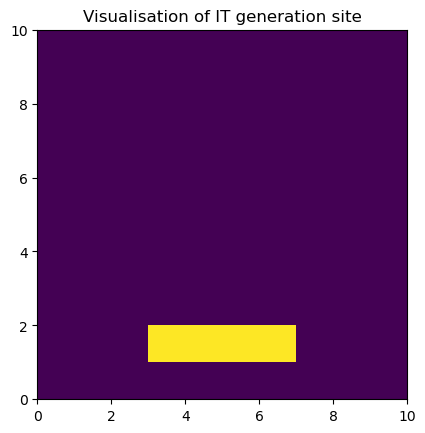

In [21]:
array_itg = np.zeros_like(State.params['itg'][0])
array_itg[1,3:7]=1e-3
fig,ax = plt.subplots(1,1)
ax.pcolormesh(array_itg)
ax.set_aspect("equal")
ax.set_title("Visualisation of IT generation site")
State.params['itg'][1]=array_itg

In [22]:
print(np.round(State.var['ssh'],decimals=3))

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. nan nan nan nan  0.  0.  0.]
 [ 0.  0.  0. nan nan nan nan  0.  0.  0.]
 [ 0.  0.  0. nan nan nan nan  0.  0.  0.]
 [ 0.  0.  0. nan nan nan nan  0.  0.  0.]
 [ 0.  0.  0. nan nan nan nan  0.  0.  0.]
 [ 0.  0.  0. nan nan nan nan  0.  0.  0.]]


In [23]:
t=0

In [24]:
Model.step(State,t=t,nstep=1)
t+=1*Model.dt
t


300

In [25]:
print(np.round(State.var['u'],decimals=3))

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. nan nan nan nan nan nan nan  0.  0.]
 [ 0. nan nan nan nan nan nan nan  0.  0.]
 [ 0. nan  0. nan nan nan nan nan nan  0.]
 [ 0. nan  0. nan nan nan nan nan nan  0.]
 [ 0. nan  0. nan nan nan nan nan nan  0.]
 [ 0. nan  0. nan nan nan nan nan nan  0.]
 [ 0. nan  0. nan nan nan nan nan nan  0.]
 [ 0. nan  0. nan nan nan nan nan nan  0.]]


In [ ]:
State.var['ssh'][2,:]

In [ ]:
State.var['ssh']

In [ ]:
Model.step(State,nstep=400)

In [ ]:
fig,ax = plt.subplots(1,1)
ax.pcolormesh(State.var['ssh'],cmap='RdBu',vmin=-1.5,vmax=1.5)
#ax.colorbar()
ax.set_aspect("equal")

In [ ]:
plt.bar(np.arange(0,10),State.var['ssh'][4,:])

In [ ]:
State.var['ssh']

In [ ]:
Model.step(State,nstep=1)

In [ ]:
State.var['u']